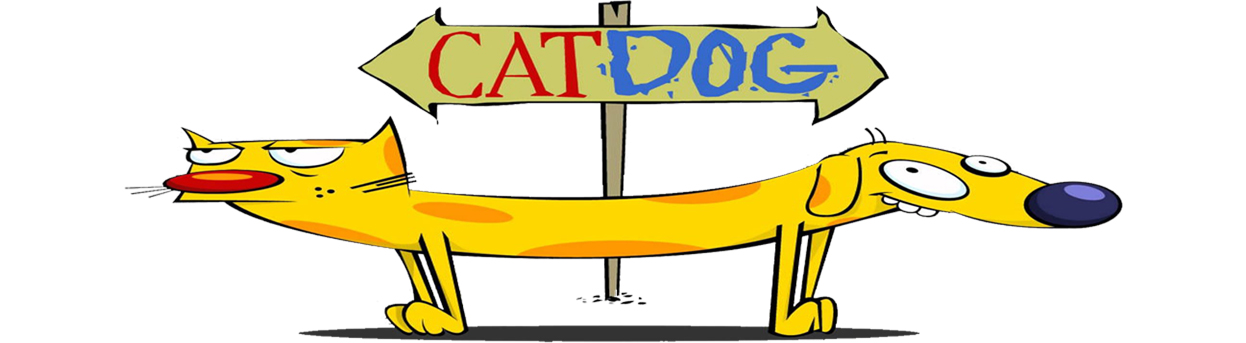

In [1]:
from IPython.display import Image
Image("cat_and_dog_logo.jpg")

###### in this notebook we compare the prediction of a data of images of cats and dogs using different types of preprocessing - gray scale, mean of the RGB channels and edge detaction - with and without normalization, different types of ML models - KNN, Random forest, logistic regression and SVM, and different function to find hyperparmeters - grid search and random search.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC  
from sklearn import linear_model, decomposition, datasets
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.cluster.vq import kmeans2, vq, whiten
from tqdm import tqdm


# Exmple of the data

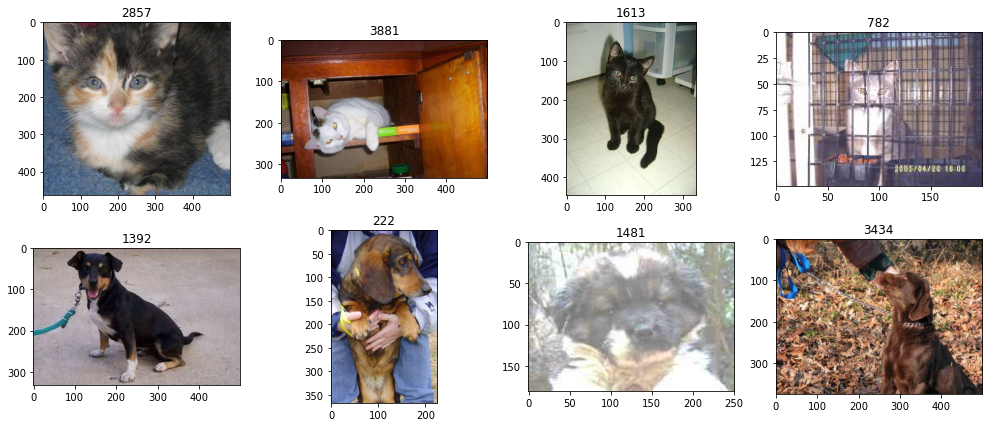

In [3]:
import random
import matplotlib.image as mpimg
f = plt.figure(figsize=(17,7))
for i in range(1,5):
    r=random.randint(1,4001)
    img=mpimg.imread("cat_and_dog/training_set/training_set/cats/cat.{}.jpg".format(r))
    ax=f.add_subplot(2,4,i)
    ax.title.set_text(r)
    plt.imshow(img)
    r=random.randint(1,4001)
    img=mpimg.imread("cat_and_dog/training_set/training_set/dogs/dog.{}.jpg".format(r))
    ax=f.add_subplot(2,4,i+4)
    ax.title.set_text(r)
    plt.imshow(img)

# Import the data

Data from https://www.kaggle.com/tongpython/cat-and-dog

In [121]:
train_cats_x_gray = np.asarray(
    [cv2.resize(cv2.imread("cat_and_dog/training_set/training_set/cats/cat.{}.jpg".format(i), cv2.IMREAD_GRAYSCALE),
                   (32, 32)).flatten() for i in range(1, 4001)])
train_cats_y_gray = np.zeros(shape=(4000,))

train_dogs_x_gray = np.asarray(
    [cv2.resize(cv2.imread("cat_and_dog/training_set/training_set/dogs/dog.{}.jpg".format(i), cv2.IMREAD_GRAYSCALE),
                   (32, 32)).flatten() for i in range(1, 4001)], dtype=np.ndarray)
train_dogs_y_gray = np.ones(shape=(4000,))

x_train_gray = np.append(train_cats_x_gray, train_dogs_x_gray, axis=0)
y_train_gray = np.append(train_cats_y_gray, train_dogs_y_gray, axis=0)

test_cats_x_gray = np.asarray(
    [cv2.resize(cv2.imread("cat_and_dog/test_set/test_set/cats/cat.{}.jpg".format(i), cv2.IMREAD_GRAYSCALE),
                          (32, 32)).flatten() for i in range(4001, 5001)])
test_cats_y_gray = np.zeros(shape=(1000,))

test_dogs_x_gray = np.asarray(
    [cv2.resize(cv2.imread("cat_and_dog/test_set/test_set/dogs/dog.{}.jpg".format(i), cv2.IMREAD_GRAYSCALE),
                          (32, 32)).flatten() for i in range(4001, 5001)])
test_dogs_y_gray = np.ones(shape=(1000,))

x_test_gray = np.append(test_cats_x_gray, test_dogs_x_gray, axis=0)
y_test_gray = np.append(test_cats_y_gray, test_dogs_y_gray, axis=0)

### save

In [122]:
pd.DataFrame(x_train_gray).to_csv("csv_files/train_gray.csv")
pd.DataFrame(y_train_gray).to_csv("csv_files/train_label_gray.csv")
pd.DataFrame(x_test_gray).to_csv("csv_files/test_gray.csv")
pd.DataFrame(y_test_gray).to_csv("csv_files/test_label_gray.csv")

### Load the data

In [2]:
x_train_gray = pd.read_csv("csv_files/train_gray.csv").to_numpy()[:,1:]
y_train_gray = pd.read_csv("csv_files/train_label_gray.csv").to_numpy()[:,1:]
x_test_gray = pd.read_csv("csv_files/test_gray.csv").to_numpy()[:,1:]
y_test_gray = pd.read_csv("csv_files/test_label_gray.csv").to_numpy()[:,1:]

In [3]:
#normalize
s=StandardScaler()
#x_train_gray_N = (x_train_gray-x_train_gray.mean())/x_train_gray.std()
x_train_gray_N=s.fit_transform(x_train_gray)
y_train_gray_N = y_train_gray
#x_test_gray_N = (x_test_gray-x_test_gray.mean())/x_test_gray.std()
x_test_gray_N=s.fit_transform(x_test_gray)
y_test_gray_N = y_test_gray

## Mean RGB

In [123]:
train_cats_x_meanRGB = np.asarray(
    [cv2.resize(cv2.imread("cat_and_dog/training_set/training_set/cats/cat.{}.jpg".format(i)),
                   (32, 32)).mean(axis=2).flatten() for i in range(1, 4001)])
train_cats_y_meanRGB = np.zeros(shape=(4000,))

train_dogs_x_meanRGB = np.asarray(
    [cv2.resize(cv2.imread("cat_and_dog/training_set/training_set/dogs/dog.{}.jpg".format(i)),
                   (32, 32)).mean(axis=2).flatten() for i in range(1, 4001)], dtype=np.ndarray)
train_dogs_y_meanRGB = np.ones(shape=(4000,))

x_train_meanRGB = np.append(train_cats_x_meanRGB, train_dogs_x_meanRGB, axis=0)
y_train_meanRGB = np.append(train_cats_y_meanRGB, train_dogs_y_meanRGB, axis=0)

test_cats_x_meanRGB = np.asarray(
    [cv2.resize(cv2.imread("cat_and_dog/test_set/test_set/cats/cat.{}.jpg".format(i)),
                          (32, 32)).mean(axis=2).flatten() for i in range(4001, 5001)])
test_cats_y_meanRGB = np.zeros(shape=(1000,))

test_dogs_x_meanRGB = np.asarray(
    [cv2.resize(cv2.imread("cat_and_dog/test_set/test_set/dogs/dog.{}.jpg".format(i)),
                          (32, 32)).mean(axis=2).flatten() for i in range(4001, 5001)])
test_dogs_y_meanRGB = np.ones(shape=(1000,))

x_test_meanRGB = np.append(test_cats_x_meanRGB, test_dogs_x_meanRGB, axis=0)
y_test_meanRGB = np.append(test_cats_y_meanRGB, test_dogs_y_meanRGB, axis=0)


### save the data

In [124]:
pd.DataFrame(x_train_meanRGB).to_csv("csv_files/train_meanRGB.csv")
pd.DataFrame(y_train_meanRGB).to_csv("csv_files/train_label_meanRGB.csv")
pd.DataFrame(x_test_meanRGB).to_csv("csv_files/test_meanRGB.csv")
pd.DataFrame(y_test_meanRGB).to_csv("csv_files/test_label_meanRGB.csv")

### Load the data

In [4]:
x_train_meanRGB = pd.read_csv("csv_files/train_meanRGB.csv").to_numpy()[:,1:]
y_train_meanRGB = pd.read_csv("csv_files/train_label_meanRGB.csv").to_numpy()[:,1:]
x_test_meanRGB = pd.read_csv("csv_files/test_meanRGB.csv").to_numpy()[:,1:]
y_test_meanRGB = pd.read_csv("csv_files/test_label_meanRGB.csv").to_numpy()[:,1:]

In [5]:
#normalize
s=StandardScaler()
#x_train_meanRGB_N = (x_train_meanRGB-x_train_meanRGB.mean())/x_train_meanRGB.std()
x_train_meanRGB_N=s.fit_transform(x_train_meanRGB)
y_train_meanRGB_N = y_train_meanRGB
#x_test_meanRGB_N = (x_test_meanRGB-x_test_meanRGB.mean())/x_test_meanRGB.std()
x_test_meanRGB_N=s.fit_transform(x_test_meanRGB)
y_test_meanRGB_N = y_test_meanRGB

## Edge detection

https://debuggercafe.com/edge-detection-using-structured-forests-with-opencv/

(414, 500)


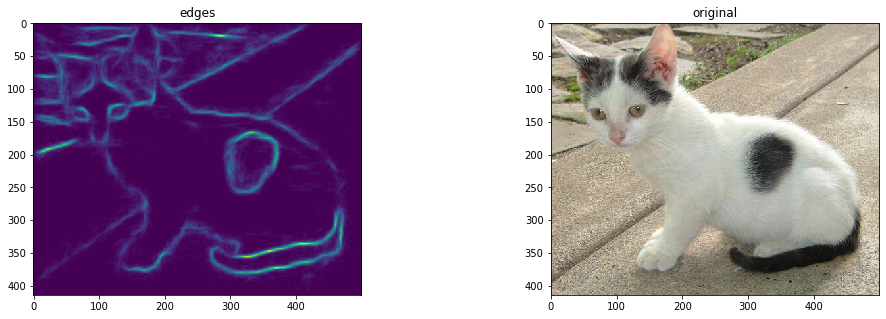

In [120]:
import matplotlib.image as mpimg
image = cv2.imread("cat_and_dog/training_set/training_set/cats/cat.3.jpg",cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0
# initialize the structured edge detector with the model
edge_detector = cv2.ximgproc.createStructuredEdgeDetection('model.yml')
# detect the edges
edges = edge_detector.detectEdges(image)
#show
f = plt.figure(figsize=(17,5))
ax=f.add_subplot(1,2,1)
ax.title.set_text("edges")
plt.imshow(edges)
ax=f.add_subplot(1,2,2)
ax.title.set_text("original")
plt.imshow(mpimg.imread("cat_and_dog/training_set/training_set/cats/cat.3.jpg"))
print(edges.shape)

In [125]:
edge_detector = cv2.ximgproc.createStructuredEdgeDetection('model.yml')

train_cats_x = train_cats_x =np.asarray([edge_detector.detectEdges(cv2.resize(
    (cv2.imread("cat_and_dog/training_set/training_set/cats/cat.{}.jpg".format(i),cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0)
    ,(32, 32))).flatten() for i in range(1,4001)])
train_cats_y = np.zeros(shape=(4000,))

train_dogs_x =np.asarray([edge_detector.detectEdges(cv2.resize(
    (cv2.imread("cat_and_dog/training_set/training_set/dogs/dog.{}.jpg".format(i),cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0)
    ,(32, 32))).flatten() for i in range(1,4001)])
train_dogs_y = np.ones(shape=(4000,))

x_train = np.append(train_cats_x, train_dogs_x, axis=0)
y_train = np.append(train_cats_y, train_dogs_y, axis=0)

test_cats_x = train_cats_x =np.asarray([edge_detector.detectEdges(cv2.resize(
    (cv2.imread("cat_and_dog/test_set/test_set/cats/cat.{}.jpg".format(i),cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0)
    ,(32, 32))).flatten() for i in range(4001, 5001)])
test_cats_y = np.zeros(shape=(1000,))

test_dogs_x = train_cats_x =np.asarray([edge_detector.detectEdges(cv2.resize(
    (cv2.imread("cat_and_dog/test_set/test_set/dogs/dog.{}.jpg".format(i),cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0)
    ,(32, 32))).flatten() for i in range(4001, 5001)])
test_dogs_y = np.ones(shape=(1000,))

x_test = np.append(test_cats_x, test_dogs_x, axis=0)
y_test = np.append(test_cats_y, test_dogs_y, axis=0)

X=np.append(x_test, x_train, axis=0)
y=np.append(y_test, y_train, axis=0)

### save the data

In [126]:
pd.DataFrame(x_train).to_csv("csv_files/train_edges.csv")
pd.DataFrame(y_train).to_csv("csv_files/train_label_edges.csv")
pd.DataFrame(x_test).to_csv("csv_files/test_edges.csv")
pd.DataFrame(y_test).to_csv("csv_files/test_label_edges.csv")

### load the data

In [6]:
x_train_edges = pd.read_csv("csv_files/train_edges.csv").to_numpy()[:,1:]
y_train_edges = pd.read_csv("csv_files/train_label_edges.csv").to_numpy()[:,1:]
x_test_edges = pd.read_csv("csv_files/test_edges.csv").to_numpy()[:,1:]
y_test_edges = pd.read_csv("csv_files/test_label_edges.csv").to_numpy()[:,1:]

In [7]:
#normalize
s=StandardScaler()
#x_train_edges_N = (x_train_edges-x_train_edges.mean())/x_train_edges.std()
x_train_edges_N=s.fit_transform(x_train_edges)
y_train_edges_N = y_train_edges
#x_test_edges_N = (x_test_edges-x_test_edges.mean())/x_test_edges.std()
x_test_edges_N=s.fit_transform(x_test_edges)
y_test_edges_N = y_test_edges

# MODELS

In [8]:
def print_grid_score(grid,x_test,y_test,plot = 1):
    print("Best parameters set found on development set:")
    print()
    print(" %0.3f" %grid.best_score_ , grid.best_params_, "\n")
#     print()
#     print("Grid scores on development set:")
#     print()
    means = grid.cv_results_['mean_test_score']
    stds = grid.cv_results_['std_test_score']
    uni_scor = []
    dist_scor = []
    n = []
    for mean, std, params in zip(means, stds, grid.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r"
#               % (mean, std * 2, params))
        if plot == 1 and params['weights'] == 'uniform':
            uni_scor.append(mean)
            n.append(params['n_neighbors'])
        elif plot == 1:
            dist_scor.append(mean)
    print()
    print("")
    y_true, y_pred = y_test, grid.predict(x_test)
    print(classification_report(y_true, y_pred))
    if plot == 1 :
        plt.plot(n,uni_scor,marker ="o", label = 'Uniform')
        plt.plot(n,dist_scor,marker ="o", label = 'Distance')
        plt.xlabel("Neighbors")
        plt.ylabel("Mean Test Score")
        plt.legend()

## KNN

### Grid Search

In [9]:
n_neighbors = [70,80,90,100,110]
weights = ["uniform", "distance"]
hyperparameters = dict(n_neighbors=n_neighbors, weights=weights)
grid_search = GridSearchCV(KNeighborsClassifier(), hyperparameters, cv=5, scoring='accuracy', n_jobs=-1)

#### gray

Best parameters set found on development set:

 0.587 {'n_neighbors': 100, 'weights': 'distance'} 



              precision    recall  f1-score   support

         0.0       0.58      0.76      0.66      1000
         1.0       0.65      0.45      0.53      1000

    accuracy                           0.60      2000
   macro avg       0.62      0.60      0.60      2000
weighted avg       0.62      0.60      0.60      2000



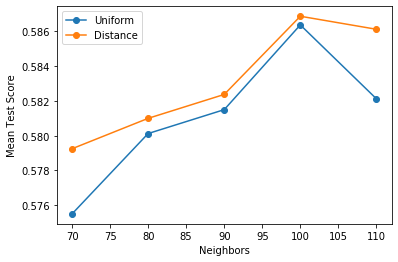

In [10]:
# without normalization
grid_search.fit(x_train_gray, y_train_gray)
print_grid_score(grid_search,x_test_gray,y_test_gray)

Best parameters set found on development set:

 0.588 {'n_neighbors': 110, 'weights': 'distance'} 



              precision    recall  f1-score   support

         0.0       0.58      0.73      0.65      1000
         1.0       0.63      0.46      0.53      1000

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.59      2000
weighted avg       0.60      0.60      0.59      2000



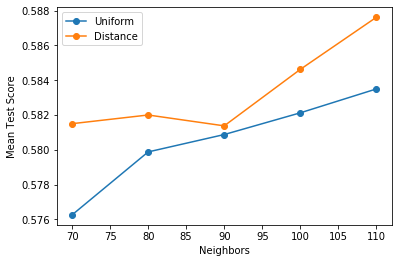

In [11]:
# with normalization
grid_search.fit(x_train_gray_N, y_train_gray_N)
print_grid_score(grid_search,x_test_gray_N,y_test_gray_N)

#### RGB mean

Best parameters set found on development set:

 0.580 {'n_neighbors': 100, 'weights': 'distance'} 



              precision    recall  f1-score   support

         0.0       0.57      0.71      0.63      1000
         1.0       0.61      0.46      0.53      1000

    accuracy                           0.58      2000
   macro avg       0.59      0.58      0.58      2000
weighted avg       0.59      0.58      0.58      2000



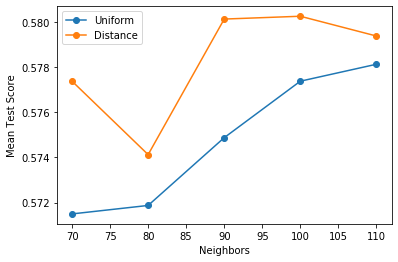

In [12]:
# without normalization
grid_search.fit(x_train_meanRGB, y_train_meanRGB)
print_grid_score(grid_search,x_test_meanRGB,y_test_meanRGB)

Best parameters set found on development set:

 0.581 {'n_neighbors': 100, 'weights': 'distance'} 



              precision    recall  f1-score   support

         0.0       0.57      0.70      0.63      1000
         1.0       0.61      0.47      0.53      1000

    accuracy                           0.59      2000
   macro avg       0.59      0.59      0.58      2000
weighted avg       0.59      0.59      0.58      2000



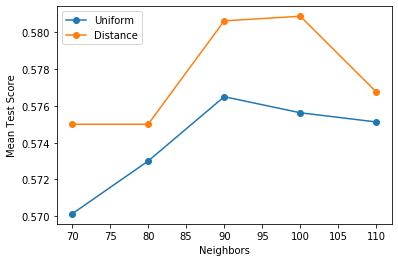

In [13]:
# with normalization
grid_search.fit(x_train_meanRGB_N, y_train_meanRGB_N)
print_grid_score(grid_search,x_test_meanRGB_N,y_test_meanRGB_N)

#### Edges

Best parameters set found on development set:

 0.587 {'n_neighbors': 100, 'weights': 'uniform'} 



              precision    recall  f1-score   support

         0.0       0.65      0.38      0.48      1000
         1.0       0.56      0.80      0.66      1000

    accuracy                           0.59      2000
   macro avg       0.60      0.59      0.57      2000
weighted avg       0.60      0.59      0.57      2000



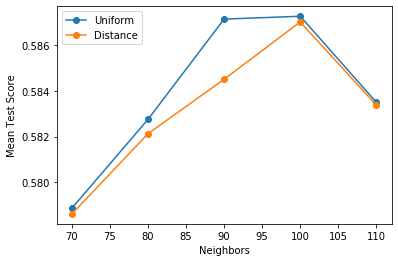

In [14]:
# without normalization
grid_search.fit(x_train_edges, y_train_edges)
print_grid_score(grid_search,x_test_edges,y_test_edges)

Best parameters set found on development set:

 0.583 {'n_neighbors': 70, 'weights': 'uniform'} 



              precision    recall  f1-score   support

         0.0       0.66      0.32      0.43      1000
         1.0       0.55      0.83      0.66      1000

    accuracy                           0.58      2000
   macro avg       0.61      0.58      0.55      2000
weighted avg       0.61      0.58      0.55      2000



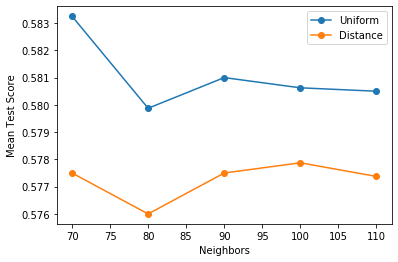

In [15]:
# without normalization
grid_search.fit(x_train_edges_N, y_train_edges_N)
print_grid_score(grid_search,x_test_edges_N,y_test_edges_N)

### Random Search

In [16]:
rand_n_neighbors = [int(i) for i in range(130,181,5)]
rand_weights = ["uniform", "distance"]
rand_hyperparameters = dict(n_neighbors=rand_n_neighbors, weights=rand_weights)
rand = RandomizedSearchCV(KNeighborsClassifier(), rand_hyperparameters, cv=10, scoring='accuracy', n_iter=50, n_jobs=-1)

#### Gray scale

Best parameters set found on development set:

 0.589 {'weights': 'uniform', 'n_neighbors': 175} 



              precision    recall  f1-score   support

         0.0       0.59      0.67      0.63      1000
         1.0       0.62      0.54      0.58      1000

    accuracy                           0.60      2000
   macro avg       0.61      0.60      0.60      2000
weighted avg       0.61      0.60      0.60      2000



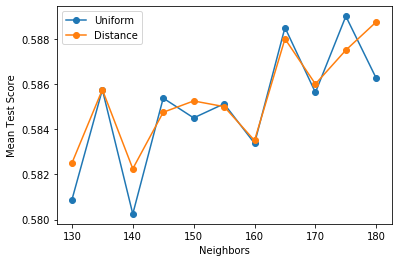

In [17]:
# without normalization
rand.fit(x_train_gray, y_train_gray)
print_grid_score(rand,x_test_gray,y_test_gray)

Best parameters set found on development set:

 0.591 {'weights': 'distance', 'n_neighbors': 170} 



              precision    recall  f1-score   support

         0.0       0.59      0.68      0.63      1000
         1.0       0.62      0.54      0.58      1000

    accuracy                           0.60      2000
   macro avg       0.61      0.60      0.60      2000
weighted avg       0.61      0.60      0.60      2000



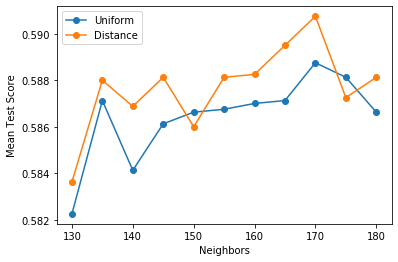

In [18]:
# with normalization
rand.fit(x_train_gray_N, y_train_gray_N)
print_grid_score(rand,x_test_gray_N,y_test_gray_N)

#### RGB mean

Best parameters set found on development set:

 0.593 {'weights': 'distance', 'n_neighbors': 180} 



              precision    recall  f1-score   support

         0.0       0.61      0.66      0.63      1000
         1.0       0.63      0.57      0.60      1000

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.61      2000
weighted avg       0.62      0.62      0.61      2000



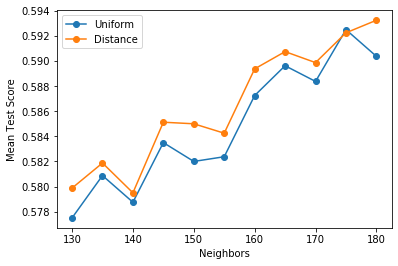

In [19]:
# without normalization
rand.fit(x_train_meanRGB, y_train_meanRGB)
print_grid_score(rand,x_test_meanRGB,y_test_meanRGB)

Best parameters set found on development set:

 0.593 {'weights': 'distance', 'n_neighbors': 165} 



              precision    recall  f1-score   support

         0.0       0.60      0.65      0.62      1000
         1.0       0.62      0.56      0.59      1000

    accuracy                           0.61      2000
   macro avg       0.61      0.61      0.61      2000
weighted avg       0.61      0.61      0.61      2000



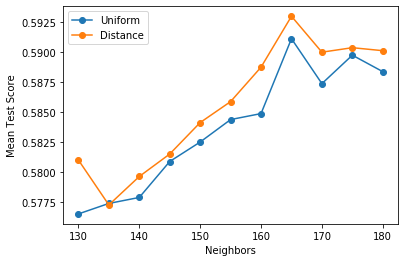

In [20]:
# with normalization
rand.fit(x_train_meanRGB_N, y_train_meanRGB_N)
print_grid_score(rand,x_test_meanRGB_N,y_test_meanRGB_N)

#### Edges

Best parameters set found on development set:

 0.584 {'weights': 'uniform', 'n_neighbors': 140} 



              precision    recall  f1-score   support

         0.0       0.67      0.35      0.46      1000
         1.0       0.56      0.83      0.67      1000

    accuracy                           0.59      2000
   macro avg       0.61      0.59      0.56      2000
weighted avg       0.61      0.59      0.56      2000



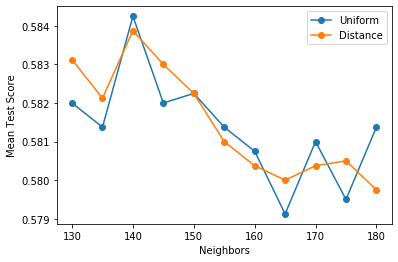

In [21]:
# without normalization
rand.fit(x_train_edges, y_train_edges)
print_grid_score(rand,x_test_edges,y_test_edges)

Best parameters set found on development set:

 0.577 {'weights': 'uniform', 'n_neighbors': 140} 



              precision    recall  f1-score   support

         0.0       0.69      0.27      0.39      1000
         1.0       0.55      0.88      0.67      1000

    accuracy                           0.57      2000
   macro avg       0.62      0.57      0.53      2000
weighted avg       0.62      0.57      0.53      2000



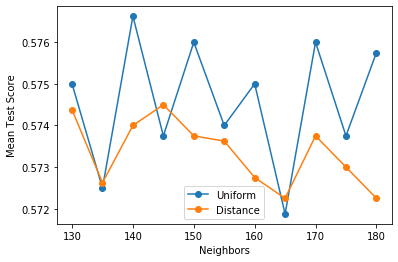

In [22]:
# with normalization
rand.fit(x_train_edges_N, y_train_edges_N)
print_grid_score(rand,x_test_edges_N,y_test_edges_N)

# Random Forest

### Grid search

In [23]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [90],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [2, 4],
    'min_samples_split': [10,20],
    'n_estimators': [150,200]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,cv=3, n_jobs=-1, verbose=2)

#### gray

In [24]:
#without normalization
grid_search.fit(x_train_gray, y_train_gray)
print_grid_score(grid_search,x_test_gray,y_test_gray,0)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  6.5min finished


Best parameters set found on development set:

 0.629 {'bootstrap': True, 'max_depth': 90, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200} 



              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65      1000
         1.0       0.65      0.62      0.63      1000

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.64      2000
weighted avg       0.65      0.65      0.64      2000



In [25]:
#with normalization
grid_search.fit(x_train_gray_N, y_train_gray_N)
print_grid_score(grid_search,x_test_gray_N,y_test_gray_N,0)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  6.9min finished


Best parameters set found on development set:

 0.632 {'bootstrap': True, 'max_depth': 90, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 200} 



              precision    recall  f1-score   support

         0.0       0.63      0.67      0.65      1000
         1.0       0.64      0.60      0.62      1000

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.63      2000
weighted avg       0.64      0.64      0.63      2000



#### mean RGB

In [26]:
#without normalization
grid_search.fit(x_train_meanRGB, y_train_meanRGB)
print_grid_score(grid_search,x_test_meanRGB,y_test_meanRGB,0)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  7.9min finished


Best parameters set found on development set:

 0.631 {'bootstrap': True, 'max_depth': 90, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200} 



              precision    recall  f1-score   support

         0.0       0.63      0.66      0.64      1000
         1.0       0.64      0.60      0.62      1000

    accuracy                           0.63      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.63      0.63      0.63      2000



In [27]:
#with normalization
grid_search.fit(x_train_meanRGB_N, y_train_meanRGB_N)
print_grid_score(grid_search,x_test_meanRGB_N,y_test_meanRGB_N,0)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  8.0min finished


Best parameters set found on development set:

 0.630 {'bootstrap': True, 'max_depth': 90, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200} 



              precision    recall  f1-score   support

         0.0       0.63      0.67      0.65      1000
         1.0       0.65      0.61      0.63      1000

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000



#### Edges

In [28]:
#without normalization
grid_search.fit(x_train_edges, y_train_edges)
print_grid_score(grid_search,x_test_edges,y_test_edges,0)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  5.3min finished


Best parameters set found on development set:

 0.617 {'bootstrap': True, 'max_depth': 90, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 200} 



              precision    recall  f1-score   support

         0.0       0.59      0.59      0.59      1000
         1.0       0.59      0.59      0.59      1000

    accuracy                           0.59      2000
   macro avg       0.59      0.59      0.59      2000
weighted avg       0.59      0.59      0.59      2000



In [29]:
#with normalization
grid_search.fit(x_train_edges_N, y_train_edges_N)
print_grid_score(grid_search,x_test_edges_N,y_test_edges_N,0)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:  5.2min finished


Best parameters set found on development set:

 0.617 {'bootstrap': True, 'max_depth': 90, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 20, 'n_estimators': 200} 



              precision    recall  f1-score   support

         0.0       0.60      0.60      0.60      1000
         1.0       0.60      0.59      0.59      1000

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000



### Random search

In [30]:
rand_param_grid = {
    'bootstrap': [True, False],
    'max_depth': [90,100,150,200],
    'max_features': ['auto','sqrt','log2'],
    'min_samples_leaf': [9,10,11,12],
    'min_samples_split': [5,10,20],
    'n_estimators': [100,150,200]
}

rf_RandomGrid = RandomizedSearchCV(estimator = rf, param_distributions = rand_param_grid, cv = 3, scoring='accuracy',  
                                   verbose=2, n_jobs = -1)


#### gray

In [31]:
#without normalization
rf_RandomGrid.fit(x_train_gray, y_train_gray)
print_grid_score(rf_RandomGrid,x_test_gray,y_test_gray,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  3.8min finished


Best parameters set found on development set:

 0.627 {'n_estimators': 100, 'min_samples_split': 20, 'min_samples_leaf': 12, 'max_features': 'auto', 'max_depth': 200, 'bootstrap': False} 



              precision    recall  f1-score   support

         0.0       0.63      0.67      0.65      1000
         1.0       0.65      0.61      0.63      1000

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000



In [32]:
#with normalization
rf_RandomGrid.fit(x_train_gray_N, y_train_gray_N)
print_grid_score(rf_RandomGrid,x_test_gray_N,y_test_gray_N,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.0min finished


Best parameters set found on development set:

 0.625 {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 12, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False} 



              precision    recall  f1-score   support

         0.0       0.64      0.67      0.65      1000
         1.0       0.65      0.61      0.63      1000

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000



#### mean RGB 

In [33]:
#without normalization
rf_RandomGrid.fit(x_train_meanRGB, y_train_meanRGB)
print_grid_score(rf_RandomGrid,x_test_meanRGB,y_test_meanRGB,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


Best parameters set found on development set:

 0.628 {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': False} 



              precision    recall  f1-score   support

         0.0       0.64      0.66      0.65      1000
         1.0       0.65      0.62      0.63      1000

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000



In [34]:
#with normalization
rf_RandomGrid.fit(x_train_meanRGB_N, y_train_meanRGB_N)
print_grid_score(rf_RandomGrid,x_test_meanRGB_N,y_test_meanRGB_N,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.5min finished


Best parameters set found on development set:

 0.629 {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'auto', 'max_depth': 100, 'bootstrap': False} 



              precision    recall  f1-score   support

         0.0       0.64      0.65      0.64      1000
         1.0       0.64      0.63      0.64      1000

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000



#### Edges

In [35]:
#without normalization
rf_RandomGrid.fit(x_train_edges, y_train_edges)
print_grid_score(rf_RandomGrid,x_test_edges,y_test_edges,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.9min finished


Best parameters set found on development set:

 0.616 {'n_estimators': 150, 'min_samples_split': 10, 'min_samples_leaf': 12, 'max_features': 'auto', 'max_depth': 90, 'bootstrap': True} 



              precision    recall  f1-score   support

         0.0       0.60      0.58      0.59      1000
         1.0       0.59      0.61      0.60      1000

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000



In [36]:
#with normalization
rf_RandomGrid.fit(x_train_edges_N, y_train_edges_N)
print_grid_score(rf_RandomGrid,x_test_edges_N,y_test_edges_N,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  1.0min finished


Best parameters set found on development set:

 0.616 {'n_estimators': 200, 'min_samples_split': 20, 'min_samples_leaf': 9, 'max_features': 'log2', 'max_depth': 100, 'bootstrap': False} 



              precision    recall  f1-score   support

         0.0       0.60      0.57      0.58      1000
         1.0       0.59      0.62      0.60      1000

    accuracy                           0.59      2000
   macro avg       0.59      0.59      0.59      2000
weighted avg       0.59      0.59      0.59      2000



# Logistic Regression

### Grid search

In [37]:
log_parm={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression(solver='liblinear')
grid = GridSearchCV(logreg,log_parm,cv=3, scoring='accuracy',  verbose=2, n_jobs = -1)

#### gray scale

In [38]:
#without normalization
grid.fit(x_train_gray,y_train_gray)
print_grid_score(grid,x_test_gray,y_test_gray,0)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  3.0min finished


Best parameters set found on development set:

 0.547 {'C': 0.001, 'penalty': 'l1'} 



              precision    recall  f1-score   support

         0.0       0.55      0.57      0.56      1000
         1.0       0.56      0.54      0.55      1000

    accuracy                           0.56      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.56      0.56      0.56      2000



In [40]:
#with normalization
grid.fit(x_train_gray_N,y_train_gray_N)
print_grid_score(grid,x_test_gray_N,y_test_gray_N,0)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.1s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   40.5s finished


Best parameters set found on development set:

 0.559 {'C': 0.01, 'penalty': 'l1'} 



              precision    recall  f1-score   support

         0.0       0.57      0.57      0.57      1000
         1.0       0.57      0.57      0.57      1000

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.57      0.57      0.57      2000



#### mean RGB

In [41]:
#without normalization
grid.fit(x_train_meanRGB,y_train_meanRGB)
print_grid_score(grid,x_test_meanRGB,y_test_meanRGB,0)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:  2.8min finished


Best parameters set found on development set:

 0.552 {'C': 0.001, 'penalty': 'l1'} 



              precision    recall  f1-score   support

         0.0       0.56      0.58      0.57      1000
         1.0       0.56      0.54      0.55      1000

    accuracy                           0.56      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.56      0.56      0.56      2000



In [42]:
#with normalization
grid.fit(x_train_meanRGB_N,y_train_meanRGB_N)
print_grid_score(grid,x_test_meanRGB_N,y_test_meanRGB_N,0)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed:   39.4s finished


Best parameters set found on development set:

 0.562 {'C': 0.001, 'penalty': 'l2'} 



              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56      1000
         1.0       0.56      0.56      0.56      1000

    accuracy                           0.56      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.56      0.56      0.56      2000



#### Egde detection

In [44]:
#without normalization
grid.fit(x_train_edges,y_train_edges)
print_grid_score(grid,x_test_edges,y_test_edges,0)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.2s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed: 18.6min finished


Best parameters set found on development set:

 0.597 {'C': 1.0, 'penalty': 'l2'} 



              precision    recall  f1-score   support

         0.0       0.59      0.54      0.56      1000
         1.0       0.57      0.63      0.60      1000

    accuracy                           0.58      2000
   macro avg       0.58      0.58      0.58      2000
weighted avg       0.58      0.58      0.58      2000



In [45]:
#with normalization
grid.fit(x_train_edges_N,y_train_edges_N)
print_grid_score(grid,x_test_edges_N,y_test_edges_N,0)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed: 44.1min finished


Best parameters set found on development set:

 0.595 {'C': 0.001, 'penalty': 'l2'} 



              precision    recall  f1-score   support

         0.0       0.59      0.54      0.56      1000
         1.0       0.57      0.62      0.59      1000

    accuracy                           0.58      2000
   macro avg       0.58      0.58      0.58      2000
weighted avg       0.58      0.58      0.58      2000



### Random search

In [67]:
logreg_rand=LogisticRegression()
# l1 lasso l2 ridge
log_parm_rand={"solver":['newton-cg', 'lbfgs'],"C":np.logspace(-3,4,3,6,7), "penalty":["none","l2"]}
lr_RandomGrid = RandomizedSearchCV(estimator = logreg_rand, param_distributions = log_parm_rand, cv = 3, scoring='accuracy',  
                                   verbose=2, n_jobs = -1)

#### gray scale

In [68]:
#without normalization
lr_RandomGrid.fit(x_train_gray, y_train_gray)
print_grid_score(lr_RandomGrid,x_test_gray,y_test_gray,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.8min finished


Best parameters set found on development set:

 0.530 {'solver': 'lbfgs', 'penalty': 'none', 'C': 0.0029154518950437317} 



              precision    recall  f1-score   support

         0.0       0.53      0.55      0.54      1000
         1.0       0.54      0.52      0.53      1000

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.53      2000
weighted avg       0.54      0.54      0.53      2000



In [69]:
#with normalization
lr_RandomGrid.fit(x_train_gray_N, y_train_gray_N)
print_grid_score(lr_RandomGrid,x_test_gray_N,y_test_gray_N,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   45.8s finished


Best parameters set found on development set:

 0.552 {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.0029154518950437317} 



              precision    recall  f1-score   support

         0.0       0.55      0.56      0.56      1000
         1.0       0.55      0.55      0.55      1000

    accuracy                           0.55      2000
   macro avg       0.55      0.55      0.55      2000
weighted avg       0.55      0.55      0.55      2000



#### mean RGB 

In [70]:
#without normalization
lr_RandomGrid.fit(x_train_meanRGB, y_train_meanRGB)
print_grid_score(lr_RandomGrid,x_test_meanRGB,y_test_meanRGB,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.7min finished


Best parameters set found on development set:

 0.528 {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.0029154518950437317} 



              precision    recall  f1-score   support

         0.0       0.54      0.56      0.55      1000
         1.0       0.54      0.52      0.53      1000

    accuracy                           0.54      2000
   macro avg       0.54      0.54      0.54      2000
weighted avg       0.54      0.54      0.54      2000



In [71]:
#with normalization
lr_RandomGrid.fit(x_train_meanRGB_N, y_train_meanRGB_N)
print_grid_score(lr_RandomGrid,x_test_meanRGB_N,y_test_meanRGB_N,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   51.5s finished


Best parameters set found on development set:

 0.552 {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.0029154518950437317} 



              precision    recall  f1-score   support

         0.0       0.56      0.56      0.56      1000
         1.0       0.56      0.56      0.56      1000

    accuracy                           0.56      2000
   macro avg       0.56      0.56      0.56      2000
weighted avg       0.56      0.56      0.56      2000



#### edges

In [72]:
#without normalization
lr_RandomGrid.fit(x_train_edges, y_train_edges)
print_grid_score(lr_RandomGrid,x_test_edges,y_test_edges,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.8min finished


Best parameters set found on development set:

 0.596 {'solver': 'newton-cg', 'penalty': 'l2', 'C': 2.6457513110645907} 



              precision    recall  f1-score   support

         0.0       0.59      0.55      0.57      1000
         1.0       0.58      0.62      0.60      1000

    accuracy                           0.58      2000
   macro avg       0.58      0.58      0.58      2000
weighted avg       0.58      0.58      0.58      2000



In [73]:
#with normalization
lr_RandomGrid.fit(x_train_edges_N, y_train_edges_N)
print_grid_score(lr_RandomGrid,x_test_edges_N,y_test_edges_N,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 13.9min finished


Best parameters set found on development set:

 0.591 {'solver': 'newton-cg', 'penalty': 'l2', 'C': 0.0029154518950437317} 



              precision    recall  f1-score   support

         0.0       0.58      0.54      0.56      1000
         1.0       0.57      0.61      0.59      1000

    accuracy                           0.57      2000
   macro avg       0.57      0.57      0.57      2000
weighted avg       0.57      0.57      0.57      2000



#  SVM

### Grid search

In [48]:
svm = SVC()
svm_param = {'C': [1, 10], 'gamma': [0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(svm,svm_param,cv=3, scoring='accuracy',  verbose=2, n_jobs = -1)

#### gray scale

In [49]:
#without normalization
grid.fit(x_train_gray,y_train_gray)
print_grid_score(grid,x_test_gray,y_test_gray,0)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed: 10.2min finished


Best parameters set found on development set:

 0.583 {'C': 1, 'gamma': 0.01, 'kernel': 'poly'} 



              precision    recall  f1-score   support

         0.0       0.59      0.65      0.62      1000
         1.0       0.61      0.55      0.58      1000

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000



In [50]:
#with normalization
grid.fit(x_train_gray_N,y_train_gray_N)
print_grid_score(grid,x_test_gray_N,y_test_gray_N,0)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  9.0min finished


Best parameters set found on development set:

 0.627 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} 



              precision    recall  f1-score   support

         0.0       0.66      0.63      0.65      1000
         1.0       0.65      0.67      0.66      1000

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000



#### mean RGB

In [51]:
#without normalization
grid.fit(x_train_meanRGB,y_train_meanRGB)
print_grid_score(grid,x_test_meanRGB,y_test_meanRGB,0)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  9.9min finished


Best parameters set found on development set:

 0.580 {'C': 1, 'gamma': 0.01, 'kernel': 'poly'} 



              precision    recall  f1-score   support

         0.0       0.60      0.65      0.62      1000
         1.0       0.62      0.56      0.59      1000

    accuracy                           0.61      2000
   macro avg       0.61      0.61      0.60      2000
weighted avg       0.61      0.61      0.60      2000



In [52]:
#with normalization
grid.fit(x_train_meanRGB_N,y_train_meanRGB_N)
print_grid_score(grid,x_test_meanRGB_N,y_test_meanRGB_N,0)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  9.1min finished


Best parameters set found on development set:

 0.627 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} 



              precision    recall  f1-score   support

         0.0       0.66      0.62      0.64      1000
         1.0       0.64      0.68      0.66      1000

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000



#### edges

In [53]:
#without normalization
grid.fit(x_train_edges,y_train_edges)
print_grid_score(grid,x_test_edges,y_test_edges,0)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  9.8min finished


Best parameters set found on development set:

 0.590 {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'} 



              precision    recall  f1-score   support

         0.0       0.61      0.46      0.52      1000
         1.0       0.57      0.71      0.63      1000

    accuracy                           0.58      2000
   macro avg       0.59      0.58      0.58      2000
weighted avg       0.59      0.58      0.58      2000



In [54]:
#with normalization
grid.fit(x_train_edges_N,y_train_edges_N)
print_grid_score(grid,x_test_edges_N,y_test_edges_N,0)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 out of  36 | elapsed:  8.3min finished


Best parameters set found on development set:

 0.610 {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'} 



              precision    recall  f1-score   support

         0.0       0.61      0.56      0.58      1000
         1.0       0.59      0.65      0.62      1000

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000



### Random Search

In [56]:
svm_param_rand = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_RandomGrid = RandomizedSearchCV(estimator = svm, param_distributions = svm_param_rand, cv = 3, scoring='accuracy',  
                                    verbose=2, n_jobs = -1)

#### gray scale

In [57]:
#without normalization
svm_RandomGrid.fit(x_train_gray,y_train_gray)
print_grid_score(svm_RandomGrid,x_test_gray,y_test_gray,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.9min finished


Best parameters set found on development set:

 0.583 {'kernel': 'poly', 'gamma': 0.1, 'C': 1} 



              precision    recall  f1-score   support

         0.0       0.59      0.65      0.62      1000
         1.0       0.61      0.55      0.58      1000

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000



In [58]:
#with normalization
svm_RandomGrid.fit(x_train_gray_N,y_train_gray_N)
print_grid_score(svm_RandomGrid,x_test_gray_N,y_test_gray_N,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.5min finished


Best parameters set found on development set:

 0.600 {'kernel': 'rbf', 'gamma': 0.001, 'C': 0.1} 



              precision    recall  f1-score   support

         0.0       0.61      0.61      0.61      1000
         1.0       0.61      0.60      0.61      1000

    accuracy                           0.61      2000
   macro avg       0.61      0.61      0.61      2000
weighted avg       0.61      0.61      0.61      2000



#### mean RGB

In [59]:
#without normalization
svm_RandomGrid.fit(x_train_meanRGB,y_train_meanRGB)
print_grid_score(svm_RandomGrid,x_test_meanRGB,y_test_meanRGB,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.7min finished


Best parameters set found on development set:

 0.580 {'kernel': 'poly', 'gamma': 0.1, 'C': 0.1} 



              precision    recall  f1-score   support

         0.0       0.60      0.65      0.62      1000
         1.0       0.62      0.56      0.59      1000

    accuracy                           0.61      2000
   macro avg       0.61      0.61      0.60      2000
weighted avg       0.61      0.61      0.60      2000



In [60]:
#with normalization
svm_RandomGrid.fit(x_train_meanRGB_N,y_train_meanRGB_N)
print_grid_score(svm_RandomGrid,x_test_meanRGB_N,y_test_meanRGB_N,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.6min finished


Best parameters set found on development set:

 0.627 {'kernel': 'rbf', 'gamma': 0.001, 'C': 1} 



              precision    recall  f1-score   support

         0.0       0.66      0.62      0.64      1000
         1.0       0.64      0.68      0.66      1000

    accuracy                           0.65      2000
   macro avg       0.65      0.65      0.65      2000
weighted avg       0.65      0.65      0.65      2000



#### edges

In [61]:
#without normalization
svm_RandomGrid.fit(x_train_edges,y_train_edges)
print_grid_score(svm_RandomGrid,x_test_edges,y_test_edges,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  7.0min finished


Best parameters set found on development set:

 0.611 {'kernel': 'rbf', 'gamma': 0.1, 'C': 10} 



              precision    recall  f1-score   support

         0.0       0.61      0.50      0.55      1000
         1.0       0.58      0.69      0.63      1000

    accuracy                           0.59      2000
   macro avg       0.60      0.59      0.59      2000
weighted avg       0.60      0.59      0.59      2000



In [62]:
#with normalization
svm_RandomGrid.fit(x_train_edges_N,y_train_edges_N)
print_grid_score(svm_RandomGrid,x_test_edges_N,y_test_edges_N,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  6.0min finished


Best parameters set found on development set:

 0.610 {'kernel': 'rbf', 'gamma': 0.001, 'C': 1} 



              precision    recall  f1-score   support

         0.0       0.61      0.56      0.58      1000
         1.0       0.59      0.65      0.62      1000

    accuracy                           0.60      2000
   macro avg       0.60      0.60      0.60      2000
weighted avg       0.60      0.60      0.60      2000



# Conclusion

In [142]:
scores = pd.read_csv("scores.csv",index_col=0)
print(scores)
GS=scores.to_numpy()[:,:6].flatten()
RS=scores.to_numpy()[:,6:].flatten()
n=scores.to_numpy()[:,1::2].flatten()
notn=scores.to_numpy()[:,::2].flatten()
KNN= scores.to_numpy()[0]
RF=scores.to_numpy()[1]
LR=scores.to_numpy()[2]
SVM=scores.to_numpy()[3]
gray=scores.to_numpy()[:,[0,1,6,7]].flatten()
meanRGB=scores.to_numpy()[:,[2,3,8,9]].flatten()
edges=scores.to_numpy()[:,[4,5,10,11]].flatten()

     GS gray  GS gray_N  GS mRGB  GS mRGB N  GS edges  GS edges N  RS gray  \
KNN     0.60       0.60     0.58       0.59      0.59        0.58     0.60   
RF      0.65       0.64     0.63       0.64      0.59        0.60     0.64   
LR      0.56       0.57     0.56       0.56      0.58        0.58     0.54   
SVM     0.60       0.65     0.61       0.65      0.58        0.60     0.60   

     RS gray_N  RS mRGB  RS mRGB N  RS edges  RS edges N  
KNN       0.60     0.62       0.61      0.59        0.57  
RF        0.64     0.64       0.64      0.60        0.59  
LR        0.55     0.54       0.56      0.58        0.58  
SVM       0.61     0.61       0.65      0.59        0.60  


maxs:
max score of KNN 0.62
max score of logistic regression 0.58
max score of random forest 0.65
max score of SVM 0.65

means:
mean score of KNN 0.5941666666666667
mean score of logistic regression 0.5633333333333334
mean score of random forest 0.6249999999999999
mean score of SVM 0.6124999999999999


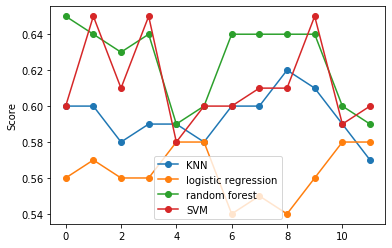

In [128]:
plt.plot(KNN,marker ="o", label = 'KNN')
plt.plot(LR,marker ="o", label = 'logistic regression')
plt.plot(RF,marker ="o", label = 'random forest')
plt.plot(SVM,marker ="o", label = 'SVM')
plt.ylabel("Score")
plt.legend()
print("maxs:")
print("max score of KNN", KNN.max())
print("max score of logistic regression", LR.max())
print("max score of random forest", RF.max())
print("max score of SVM", SVM.max())
print()
print("means:")
print("mean score of KNN", KNN.mean())
print("mean score of logistic regression", LR.mean())
print("mean score of random forest", RF.mean())
print("mean score of SVM", SVM.mean())

maxs:
max score of gray scale 0.65
max score of edge detection 0.6
max score of mean RGB 0.65

means:
mean score of gray scale 0.603125
mean score of edge detection 0.5875
mean score of random mean RGB 0.6056250000000001


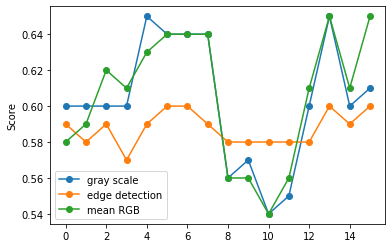

In [143]:
plt.plot(gray,marker ="o", label = 'gray scale')
plt.plot(edges,marker ="o", label = 'edge detection')
plt.plot(meanRGB,marker ="o", label = 'mean RGB')
plt.ylabel("Score")
plt.legend()
print("maxs:")
print("max score of gray scale", gray.max())
print("max score of edge detection", edges.max())
print("max score of mean RGB", meanRGB.max())
print()
print("means:")
print("mean score of gray scale", gray.mean())
print("mean score of edge detection", edges.mean())
print("mean score of random mean RGB", meanRGB.mean())

mean score of random search 0.5979166666666667
mean score of grid search 0.5995833333333334


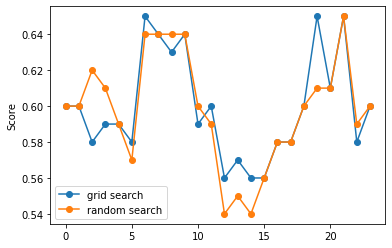

In [110]:
plt.plot(GS,marker ="o", label = 'grid search')
plt.plot(RS,marker ="o", label = 'random search')
plt.ylabel("Score")
plt.legend()
print("mean score of random search", RS.mean())
print("mean score of grid search", GS.mean())

mean score of normalize data 0.6025
mean score of not normalize data 0.595


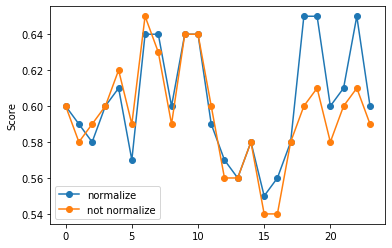

In [111]:
plt.plot(n,marker ="o", label = 'normalize')
plt.plot(notn,marker ="o", label = 'not normalize')
plt.ylabel("Score")
plt.legend()
print("mean score of normalize data", n.mean())
print("mean score of not normalize data", notn.mean())

# Bag of visual words

by https://www.youtube.com/watch?v=PRceoMWcv1U

## import the data

In [4]:
x_train_sift = []
y_train_sift = []
x_test_sift  = []
y_test_sift  = []
size = 90
sift = cv2.SIFT_create(50)
for i in tqdm(range(1,4001)):
    train_cat = cv2.resize(cv2.imread("cat_and_dog/training_set/training_set/cats/cat.{}.jpg".format(i), 1),
                (size, size), interpolation=cv2.INTER_AREA)
    kpts, des = sift.detectAndCompute(train_cat, None)
    x_train_sift.append(("cat_and_dog/training_set/training_set/cats/cat.{}.jpg".format(i),des))
    y_train_sift.append(0)
    train_dog = cv2.resize(cv2.imread("cat_and_dog/training_set/training_set/dogs/dog.{}.jpg".format(i), 1),
                (size, size), interpolation=cv2.INTER_AREA)
    kpts, des = sift.detectAndCompute(train_dog, None)
    x_train_sift.append(("cat_and_dog/training_set/training_set/dogs/dog.{}.jpg".format(i),des))
    y_train_sift.append(1)

for i in tqdm(range(4001,5001)):
    test_cat = np.asarray(cv2.resize(cv2.imread("cat_and_dog/test_set/test_set/cats/cat.{}.jpg".format(i), 1),
                (size, size), interpolation=cv2.INTER_AREA))
    kpts, des = sift.detectAndCompute(test_cat, None)
    x_test_sift.append(("cat_and_dog/test_set/test_set/cats/cat.{}.jpg".format(i),des))
    y_test_sift.append(0)
    test_dog = np.asarray(cv2.resize(cv2.imread("cat_and_dog/test_set/test_set/dogs/dog.{}.jpg".format(i), 1),
                (size, size), interpolation=cv2.INTER_AREA)) 
    kpts, des = sift.detectAndCompute(test_dog, None)
    x_test_sift.append(("cat_and_dog/test_set/test_set/dogs/dog.{}.jpg".format(i),des))
    y_test_sift.append(1)
    
y_train_sift = np.asarray(y_train_sift)
y_test_sift  = np.asarray(y_test_sift)

100%|██████████| 1000/1000 [00:12<00:00, 81.40it/s]


In [5]:
# Stack the descriptors of the key point of each image verticlly 
descriptors = x_train_sift[0][1]
for image_path, descriptor in tqdm(x_train_sift[1:]):
    descriptors = np.vstack((descriptors, descriptor))

100%|██████████| 7999/7999 [05:44<00:00, 23.19it/s] 


In [6]:
# k - the number of clusters
k = 200
# returns : voc - the central points, variance - the distance between centers
voc, variance = kmeans2(descriptors, k, iter = 3)

# Histograom for each image based on the amount of repetitions of each feture
im_features = np.zeros((len(x_train_sift), k), "float32")
for i in range(len(x_train_sift)):
    words, distance = vq(x_train_sift[i][1],voc)
    for w in words:
        im_features[i][w] += 1

test_features = np.zeros((len(x_test_sift), k), "float32")
for i in tqdm(range(len(x_test_sift))):
    words, distance = vq(x_test_sift[i][1],voc)
    for w in words:
        test_features[i][w] += 1

stdSlr = StandardScaler().fit(im_features)
im_features = stdSlr.transform(im_features)
test_features = stdSlr.transform(test_features)

100%|██████████| 2000/2000 [00:01<00:00, 1580.27it/s]


(8000, 200) (2000, 200) (390378, 128)


## Models

### KNN

Best parameters set found on development set:

 0.545 {'weights': 'distance', 'n_neighbors': 6} 



              precision    recall  f1-score   support

           0       0.53      0.81      0.64      1000
           1       0.60      0.28      0.38      1000

    accuracy                           0.55      2000
   macro avg       0.57      0.55      0.51      2000
weighted avg       0.57      0.55      0.51      2000



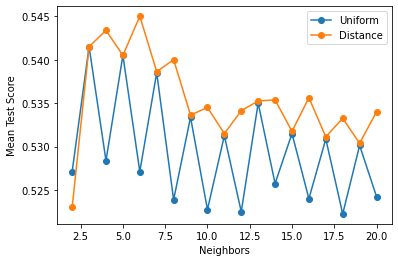

In [18]:
rand_n_neighbors = [int(i) for i in range(2,21)]
rand_weights = ["uniform", "distance"]
rand_hyperparameters = dict(n_neighbors=rand_n_neighbors, weights=rand_weights)
rand = RandomizedSearchCV(KNeighborsClassifier(), rand_hyperparameters, cv=10, scoring='accuracy', n_iter=50, n_jobs=-1)
rand.fit(im_features, y_train_sift)
print_grid_score(rand,test_features,y_test_sift)

### Random Forest

In [10]:
rf = RandomForestClassifier()
rand_param_grid = {
    'bootstrap': [True],
    'max_depth': [50,150],
    'max_features': ['auto','sqrt'],
    'min_samples_leaf': [1,2,7],
    'min_samples_split': [1,2,3],
    'n_estimators': [50,100,200]
}

rf_RandomGrid = RandomizedSearchCV(estimator = rf, param_distributions = rand_param_grid, cv = 3, scoring='accuracy',  verbose=2, n_jobs = -1)
rf_RandomGrid.fit(im_features, y_train_sift)
print_grid_score(rf_RandomGrid,test_features,y_test_sift,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters set found on development set:

 0.617 {'n_estimators': 200, 'min_samples_split': 3, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 150, 'bootstrap': True} 



              precision    recall  f1-score   support

           0       0.61      0.65      0.63      1000
           1       0.63      0.59      0.61      1000

    accuracy                           0.62      2000
   macro avg       0.62      0.62      0.62      2000
weighted avg       0.62      0.62      0.62      2000



### Logistic regression

In [11]:
logreg_rand=LogisticRegression()
# l1 lasso l2 ridge
log_parm_rand={"solver":['newton-cg', 'lbfgs'],"C":np.logspace(-3,4,3,6,7), "penalty":["none","l2"]}
lr_RandomGrid = RandomizedSearchCV(estimator = logreg_rand, param_distributions = log_parm_rand, cv = 3, scoring='accuracy',  
                                   verbose=2, n_jobs = -1)
lr_RandomGrid.fit(im_features, y_train_sift)
print_grid_score(lr_RandomGrid,test_features,y_test_sift,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters set found on development set:

 0.623 {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.0029154518950437317} 



              precision    recall  f1-score   support

           0       0.63      0.65      0.64      1000
           1       0.64      0.62      0.63      1000

    accuracy                           0.63      2000
   macro avg       0.63      0.63      0.63      2000
weighted avg       0.63      0.63      0.63      2000



### SVM

In [14]:
svm_param_rand = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svm_RandomGrid = RandomizedSearchCV(estimator = SVC(), param_distributions = svm_param_rand, cv = 3, scoring='accuracy',  
                                    verbose=2, n_jobs = -1)
svm_RandomGrid.fit(im_features, y_train_sift)
print_grid_score(svm_RandomGrid,test_features,y_test_sift,0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters set found on development set:

 0.629 {'kernel': 'rbf', 'gamma': 0.01, 'C': 1} 



              precision    recall  f1-score   support

           0       0.64      0.65      0.65      1000
           1       0.65      0.63      0.64      1000

    accuracy                           0.64      2000
   macro avg       0.64      0.64      0.64      2000
weighted avg       0.64      0.64      0.64      2000



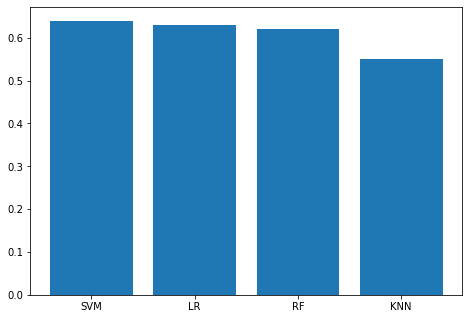

In [19]:
score = [0.64,0.63,0.62,0.55]
model = ['SVM','LR','RF','KNN']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(model,score)
plt.show()